<a href="https://colab.research.google.com/github/Arseniy16/Computational_Math/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 4
### *Численная интерполяция*

---

1. Реализовать построение полиномиального интерполянта в форме
Лагранжа, предусмотреть возможность эффективной обработки изменений значений интерполируемой функции.

2. Реализовать построенение полиномиального интерполянта в форме Ньютона, предусмотреть возможность эффективной обработки
изменений количества узлов интерполяции.

3. Реализовать построенение кубического сплайна.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Реализуем построение полиномаильного интерполянта в форме Лагранжа

$$
    L_{N}(x) = \sum_{k=0}^{N} \varphi_k(x)f_k, \quad 
    \varphi_k(x) = \prod_{i = 0 \\ i \neq k}^{N} \dfrac{x - x_i}{x_k - x_j}
$$ 

Возьмем в качестве исходной функции: $f(x) = \sin(\frac{1}{2} x^2 + 4)$

In [ ]:
# метод Лагранжа
def lagrang(x, f, tochka):
    n = len(x)
    res = 0
    for i in range(n):
        phii=1
        for j in range(n):
            if j != i:
                phii = phii*(tochka-x[j])/(x[i]-x[j])
                #print(phiitochka, "|||||", x[i],"|||||",x[j] )
        res += phii*f[i]
    return res

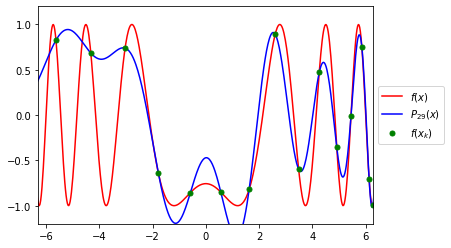

In [ ]:
n = 30

# x  = np.linspace(-a, a , n)
x = np.cos((np.arange(n)*2+1) / (2*n) * np.pi)

a = 2 * np.pi

x = a * (2 * x - 1)


def f(x):
    return np.sin(0.5*x**2+4)

fv = f(x)

t = np.linspace(-2*a, 2*a, 1000)

lagr = np.empty(len(t))
for i in range(len(t)):
    lagr[i] = lagrang(x, fv, t[i])
    
plt.plot(t, f(t), 'r', label='$f(x)$')
plt.plot(t, lagr, 'b', label='$P_{%d}(x)$' % (n-1))
plt.plot(x, fv, 'g.', ms=10, label='$f(x_k)$')
plt.axis([-a, a, -1.2, 1.2])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Реализуем построенение полиномиального интерполянта в форме Ньютона

$$
    P_n = f_0 + (x - x_0) f_{01} + (x - x_0)(x - x_1) f_{012}  + \dots + (x - x_0) \dots (x - x_{N-1})f_{012 \dots N}
$$

Здесь разделенная разность первого порядка: 
$$
    f_{ij} = f(x_i, x_j) = \dfrac{f_i - f_j}{x_i - x_j}
$$

По аналогии считаются и другие разделенные разности n-го порядка. 


In [ ]:
def divided_differences(x, f):
    n = len(x);
    F = np.empty((n, n))
    F[:, 0] = f
    for k in range(1, n):
        F[0:n-k, k] = (F[1:n-k+1, k-1] - F[0:n-k, k-1]) / (x[k:] - x[:-k])
    return F # тут F_ik это разделенная разность порядка k, для точек от x_i до x_i+k

def newton(x, F, x0):
    n = len(x);
    P = 0;
    xprod = 1.0 
    for i in range(n):
        P += F[0, i] * xprod
        xprod *= (x0 - x[i])
    return P

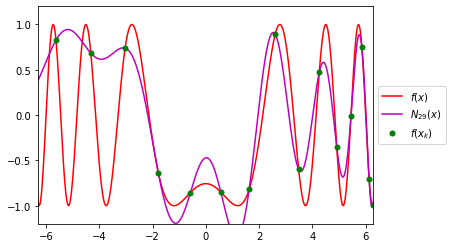

In [ ]:
F = divided_differences(x, fv)
newt = np.empty(len(t))
for i in range(len(t)):
    newt[i] = newton(x, F, t[i])

plt.plot(t, f(t), 'r', label='$f(x)$')
plt.plot(t, newt, 'm', label='$N_{%d}(x)$' % (n-1))
# plt.plot(t, lagr, 'b', label='$L_{%d}(x)$' % (n-1))
plt.plot(x, fv, 'g.', ms=10, label='$f(x_k)$')
plt.axis([-a, a, -1.2, 1.2])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Интерполянт чувствителен к погрешностям в узлах, при n>50 не хватает даже машинной точности.

Оценим ошибку интерполяции для каждого метода.

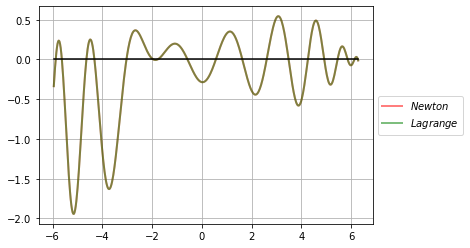

In [ ]:
# Оценим ошибку интерполяции
omega = (t - x[0]);
for i in range(1, len(x)):
    omega *= (t - x[i])
a = 263
b = 750
plt.plot(t[a:b], (f(t) - newt)[a:b], 'r', lw=2, label='$Newton$', alpha = 0.5)
plt.plot(t[a:b], (f(t) - lagr)[a:b], 'g', lw=2, label='$Lagrange$', alpha = 0.5)
plt.plot(t[a:b], 0*t[a:b], 'k')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1,.5)); plt.show()

### Реализуем кубический сплайн дефекта 1

Пусть каждая функция $s_i(x)$ определяется 4 параметрами:
$$
    s_i(x) = a_i+b_i(x−x_i)+\frac{c_i}{2}(x−x_i)^2+\frac{d_i}{6}(x−x_i)^3,\\
    a_i = s_i(x_i),\; b_i = s_i'(x_i),\; c_i = s_i''(x_i),\; d_i = s_i'''(x_i)
$$

Граничные условия для сплайна:
* $ s_i(x_i−1) = f(x_i−1),\; s_i(x_i) = f(x_i),\; i = 1,2, \dots, n $
*   $ s_i'(x_i) = s'_{i+1}(x_i),\; s''_i(x_i) = s''_{i+1}(x_i),\; i=1,2, \dots ,n−1 $
* $ s'_1(x_0) = f'(x_0),\; s'_n(x_n) = f'(x_n) $
* $ s''_1(x_0) = f''(x_0),\; s''_n(x_n) = f''(x_n) $
* Естественный сплайн: $ s''_1(x_0) = s_n''(x_n) = 0 $

Построение сплайна:

Определим функции $s_i(x)$ для кубического сплайна, рассмотрев в нашем случае Эрмитову интерполяцию.
* $s_i(x_{i−1})=f_{i−1}$
* $s_i(x_i)=f_i$
* $s'_i(x_{i−1})=m_{i−1}$
* $s'_i(x_i)=m_i$

Решая задачу построения кубического сплайна Эрмита, получаем:
$$
    s_i(x)=f_i+m_i(x−x_i) + \dfrac{2 m_i+m_{i−1}−3 f(x_{i−1}, x_i)}{x_i−x_{i−1}} (x - x_i)^2 + \dfrac{m_i+m_{i−1}− 2 f(x_{i−1}, x_i)}{(x_i−x_{i−1})^2} (x - x_i)^2
$$

In [ ]:
from scipy.linalg import solveh_banded
def cubic_spline(x, f):
    h = np.diff(x)
    n = len(h)
    df = np.diff(f) / h 
    ab = np.zeros((2, n+1))
    b = np.zeros(n+1)
    ab[0, :n] = 2 / h; ab[0, 1:] += 2 / h
    ab[1, :n] = 1 / h
    b[:n] = 3 * df / h; b[1:] += 3 * df / h
    return solveh_banded(ab, b, lower=True)


def hermite(f1,m1,f2,m2,x1,x2,x):
    h = x2-x1; fd = (f2-f1)/h; dx = x-x2;
    return f2+m2*dx+(-3*fd+m1+2*m2)*dx**2/h + (m1+m2-2*fd)*dx**3/h**2

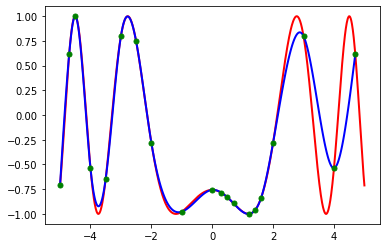

In [ ]:
xs = np.array([-5,-4.7, -4.5, -4, -3.5,-3, -2.5, -2, -1, 0, .3, .5, .7, 1.2, 1.4, 1.6, 2, 3, 4, 4.7])
ys = f(xs)
m = cubic_spline(xs, ys)
plt.plot(np.linspace(-5, 5, 1000), f(np.linspace(-5, 5, 1000)), 'r', lw=2)
for i in range(1, len(m)):
    x = np.linspace(xs[i-1], xs[i])
    plt.plot(x, hermite(ys[i-1], m[i-1], ys[i], m[i], xs[i-1], xs[i], x), 'b', lw=2)
plt.plot(xs, ys, 'g.', ms=10)
plt.show()